# (Ford-GoBike Share)
## by (Mohamed Hamdy)


## Investigation Overview

> We are going to do some analysis on the bike share dataset for Feb-2019, using charts and some statistics to figure when, where, and what kind of users whether subscriber membership or normal customers through all genders and their relation to the spent duration, and are there any relationship between these features and are they affect the duration spent during trip.

## Dataset Overview

> This data set includes information about individual rides made through a bike-sharing system covering the greater San Francisco Bay area. Time and dates at which riders used to go on a ride, also some members identifications like age, gender and membership status are included as well for each member.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df = pd.read_csv('E://z/2019-fordgobike-San Franscisco.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# shape of the data
df.shape

(183412, 16)

In [6]:
# Defining column's names to decide which are the most important 
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
# general idea about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
# Is there any Null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
#Removing Null values
df.dropna(inplace=True)

In [8]:
#New Shape after cleaning
df.shape

(174952, 16)

In [9]:
# Converting bike_id column to an object to not confused as an effective numeric while analysing
df['bike_id']=df['bike_id'].apply(str)

In [10]:
df['bike_id'].duplicated().sum()

170345

In [11]:
# See if each bike ID has been repeated and how many 
df['bike_id'].value_counts()

4794    179
4814    172
5175    167
4450    166
5145    165
       ... 
992       1
50        1
6061      1
6271      1
350       1
Name: bike_id, Length: 4607, dtype: int64

In [133]:
# Duplicated bike ID's 
df['bike_id'].duplicated().count()

174952

**After Some exploration to the data we going to remove the unwanted columns**

In [13]:
df.drop(['start_station_id','start_station_latitude','start_station_longitude',
        'end_station_id','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [14]:
df.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,Post St at Kearny St,Mission Playground,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996.0,Female,Yes


In [32]:
end_time = pd.to_datetime(df['end_time'])
start_time = pd.to_datetime(df['start_time'])

In [33]:
df['duration_hrs'] = end_time - start_time

In [34]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,start_date,start_day,start_hour,end_date,end_day,end_hour,duration_hrs
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,35.0,2019-02-28,Thursday,17,2019-03-01,Friday,8,0 days 14:29:45.830000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,NaN,2019-02-28,Thursday,18,2019-03-01,Friday,6,0 days 11:48:41.267000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,47.0,2019-02-28,Thursday,12,2019-03-01,Friday,5,0 days 17:10:54.928000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,30.0,2019-02-28,Thursday,17,2019-03-01,Friday,4,0 days 10:08:10.832000
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,45.0,2019-02-28,Thursday,23,2019-03-01,Friday,0,0 days 00:26:25.525000


In [35]:
df['duration_hrs'].describe()

count                       183412
mean     0 days 00:12:06.577548164
std      0 days 00:29:54.388971051
min         0 days 00:01:01.081000
25%         0 days 00:05:25.428500
50%         0 days 00:08:34.649500
75%         0 days 00:13:16.317000
max         0 days 23:44:04.830000
Name: duration_hrs, dtype: object

In [19]:
# Extracting day of week and hours 

In [36]:
df['start_time']=pd.to_datetime(df['start_time'])
df['start_date']= df.start_time.dt.date
df['start_day'] = pd.to_datetime(df['start_time']).dt.day_name()
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour


In [37]:
df['end_time']=pd.to_datetime(df['end_time'])
df['end_date'] =  df.end_time.dt.date
df['end_day'] = pd.to_datetime(df['end_time']).dt.day_name()
df['end_hour'] = pd.to_datetime(df['end_time']).dt.hour


In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hrs,start_date,start_day,start_hour,end_date,end_day,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0 days 14:29:45.830000,2019-02-28,Thursday,17,2019-03-01,Friday,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,0 days 17:10:54.928000,2019-02-28,Thursday,12,2019-03-01,Friday,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0 days 10:08:10.832000,2019-02-28,Thursday,17,2019-03-01,Friday,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,0 days 00:26:25.525000,2019-02-28,Thursday,23,2019-03-01,Friday,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,0 days 00:29:53.128000,2019-02-28,Thursday,23,2019-03-01,Friday,0


In [23]:
df.shape

(174952, 17)

In [38]:
df['age']= (2019- df['member_birth_year'])

In [25]:
df.head(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hrs,start_date,start_day,start_hour,end_date,end_day,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0 days 14:29:45.830000,2019-02-28,Thursday,17,2019-03-01,Friday,8,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,0 days 17:10:54.928000,2019-02-28,Thursday,12,2019-03-01,Friday,5,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0 days 10:08:10.832000,2019-02-28,Thursday,17,2019-03-01,Friday,4,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,0 days 00:26:25.525000,2019-02-28,Thursday,23,2019-03-01,Friday,0,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,0 days 00:29:53.128000,2019-02-28,Thursday,23,2019-03-01,Friday,0,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,0 days 00:19:07.484000,2019-02-28,Thursday,23,2019-03-01,Friday,0,36.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,0 days 00:26:55.990000,2019-02-28,Thursday,23,2019-03-01,Friday,0,30.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,0 days 00:26:10.925000,2019-02-28,Thursday,23,2019-03-01,Friday,0,31.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,6488,Subscriber,1992.0,Male,No,0 days 00:17:29.326000,2019-02-28,Thursday,23,2019-03-01,Friday,0,27.0
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,1996.0,Female,Yes,0 days 00:07:38.224000,2019-02-28,Thursday,23,2019-03-01,Friday,0,23.0


### What is the structure of your dataset?

**There are 174952 observation trip in this dataset with 16 features included features that I have created to make the analysis more exposed to the audience, we have many features that needed to be removed, so we are going to focus on the main features that will benefit our analysis, Age and duration are the numeric data and we'll deal with rest of features as categorical data like (gender,user type, data and days)**

### What is/are the main feature(s) of interest in your dataset?

**The main features are Trip Duration, user_type, Gender, Age, And Start Time**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**The age, start hour and the common days of the week plus duration will be a great asset in this investigation and will help me out identify the rush hours and the most common points may need to be developed and focused on due to high bikers rate initiate from this point and, And also Gender will be usfull to identify which gender more prone to use the bikeshare upon which we can make decisions about the next campagin for focusing to attract more men or mon females**

## Univariate Exploration



In [39]:
# Due to having too much starting points we will use the most 50 frequent start stations

count = df['start_station_name'].value_counts()

##### What are the most common start stations riders begin from?

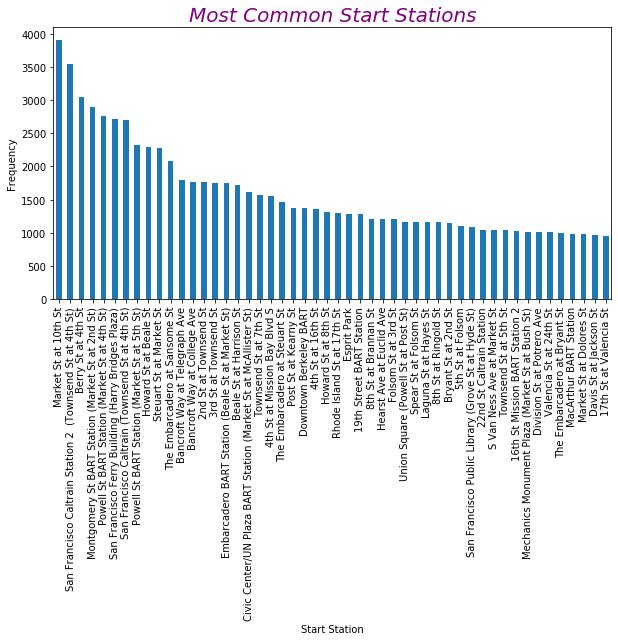

In [40]:
plt.figure(figsize=(10,5))
df['start_station_name'].value_counts()[:50].plot(kind='bar');
plt.xlabel('Start Station')
plt.ylabel('Frequency')
plt.title('Most Common Start Stations',fontsize=20,fontweight=0,style='italic',color='purple');

#### Here are the first 50 most common start stations found in the dataset, with the most common one is(Market st at 10th st)

In [41]:
# Due to having too much ending point we will use the most 50 frequest start stations
count = df['end_station_name'].value_counts()

##### what is the most common end station?

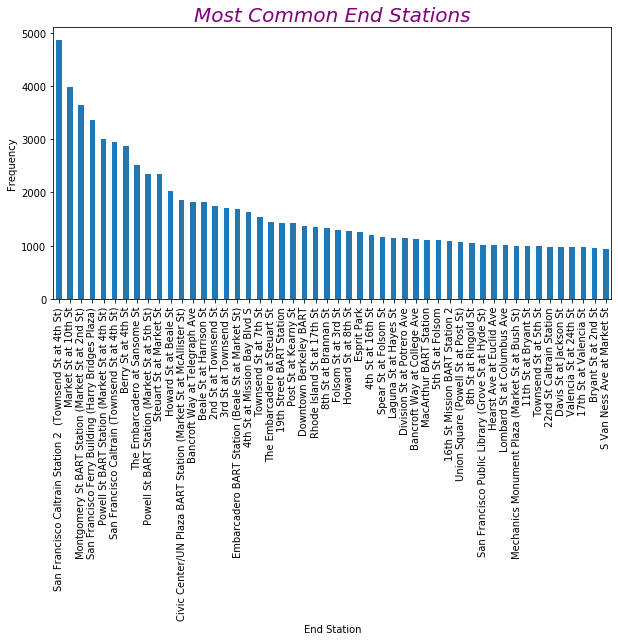

In [42]:
plt.figure(figsize=(10,5))
df['end_station_name'].value_counts()[:50].plot(kind='bar');
plt.xlabel('End Station')
plt.ylabel('Frequency')
plt.title('Most Common End Stations',fontsize=20,fontweight=0,style='italic',color='purple');

#### Here are the first 50 most common end stations found in the dataset, and the most common end station is (San Franscisco station2-Townsend sr at 4th st)

In [43]:
# Describe duration column, defining min,max, and duration mean
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [44]:
# duration mean in minutes
duration_mean = 704 / 60
print('Duration mean is: ', duration_mean)

Duration mean is:  11.733333333333333


In [45]:
# getting the log base 10 to the minimum duration 
np.log10(61)

1.7853298350107671

##### What is the average duration bikers used to spent during this month ?

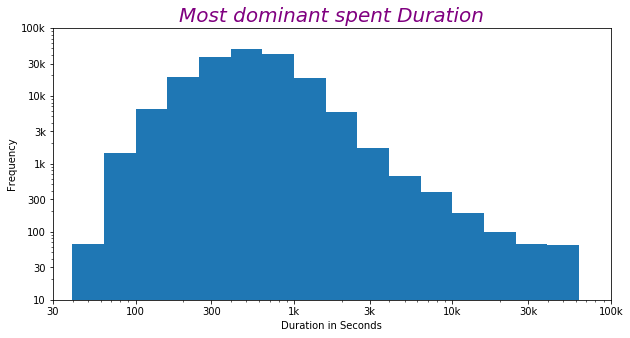

In [46]:
# Plotting Duration in sec
plt.figure(figsize=(10,5))
bin = 10**np.arange(1,np.log10(df['duration_sec'].max()+.2),.2)
plt.hist(data=df,x='duration_sec',bins=bin);
plt.xscale('log');
plt.yscale('log')
plt.xticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k'])
#x_ticks = [0.3,1,3,10,30,100,300,1000,3000,10000,100000]
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlim((30,100000));
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')
plt.title('Most dominant spent Duration',fontsize=20,fontweight=0,style='italic',color='purple');


#### Most duration falls in the zone between (300 - 2000 sec)

#### Supposed that bike_ID is related to a specific type of bike(which is an information we dont have), we can do a bar plot and see how many times each bike has been used during this month

In [48]:
# Describe age column getting min,max and the mean age
df['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

#### The mean age for the bike riders is around 34 years old, and we found out an anomoly that the max age is 141 which is not right value

In [51]:
df[df['age'] > 100]


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,start_date,start_day,start_hour,end_date,end_day,end_hour,duration_hrs
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,...,Male,Yes,119.0,2019-02-28,Thursday,19,2019-02-28,Thursday,19,0 days 00:02:28.340000
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,...,Male,No,119.0,2019-02-27,Wednesday,19,2019-02-27,Wednesday,19,0 days 00:21:55.572000
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,...,Male,No,119.0,2019-02-27,Wednesday,8,2019-02-27,Wednesday,8,0 days 00:18:51.158000
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Male,No,119.0,2019-02-26,Tuesday,17,2019-02-26,Tuesday,17,0 days 00:10:41.764000
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,...,Male,No,119.0,2019-02-26,Tuesday,8,2019-02-26,Tuesday,9,0 days 00:23:44.845000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,...,Male,No,119.0,2019-02-03,Sunday,17,2019-02-03,Sunday,17,0 days 00:22:48.342000
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,...,Male,No,119.0,2019-02-03,Sunday,9,2019-02-03,Sunday,10,0 days 00:16:33.705000
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,...,Male,No,119.0,2019-02-01,Friday,19,2019-02-01,Friday,19,0 days 00:25:27.576000
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Female,No,117.0,2019-02-01,Friday,18,2019-02-01,Friday,18,0 days 00:08:37.921000


##### what is the mean age for the participated riders?

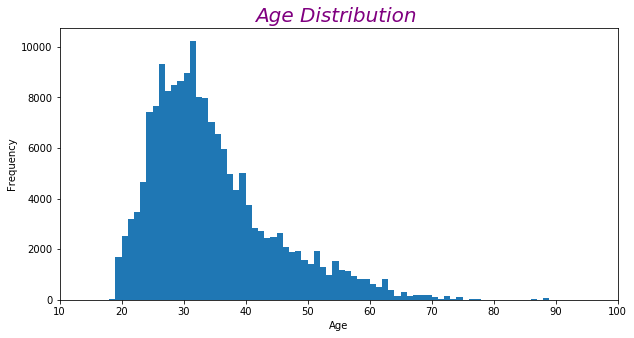

In [52]:
# plotting age column 
plt.figure(figsize=(10,5))
bin = np.arange(15,100+1,1)
plt.hist(data=df,x='age',bins=bin
        );
plt.xlim((10,100));
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution ',fontsize=20,fontweight=0,style='italic',color='purple');

#### The age of most bikers falls in the range between 25 and 34 years old, with mean 34 years old

#### we found out that we have 72 rows of age over 100 years old, so I decided to keep the rows to not remove other useful features from the data, and because they are doesn't affect our histogram interpretation

In [ ]:
# Getting the proprtion of each gender

In [54]:
counts = df.member_gender.value_counts()

In [55]:
total = df.member_gender.value_counts().sum()

In [56]:
male_prop = df.member_gender.value_counts()[0] / total
female_prop = df.member_gender.value_counts()[1] / total
other_prop = df.member_gender.value_counts()[2] /total
other_prop
male_prop

0.745950544399847

##### whats is the count of Males and Females contributed in the bike share?

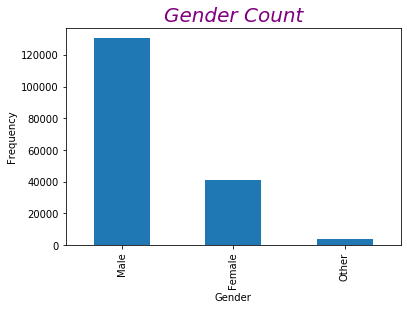

In [57]:
# Counting how many male, female, and others contributed.showing the percentage
df.member_gender.value_counts().plot(kind='bar',title='Count of Male, Female, And others');
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count',fontsize=20,fontweight=0,style='italic',color='purple');


#### Appears that male has the most dominant count over females and other gender type

##### Showing the percentage of each gender in the bike share

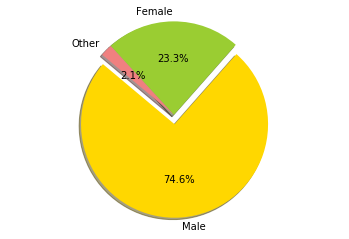

In [58]:
# showing percentage of each gender
labels = 'Male', 'Female', 'Other'
sizes = [male_prop,female_prop,other_prop]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Obviously the male has the most dominant count over female and other in this dataset, in the next plots we will consider this difference and see what if this male count dmoinancy has the same high frequency according to the other factors like duration of the trip 

In [59]:
# describing the start hour column looking for min,max and the mean 
df['start_hour'].describe()

count    183412.000000
mean         13.458421
std           4.724978
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: start_hour, dtype: float64

##### What are the most common starting hours, riders used to go on ?

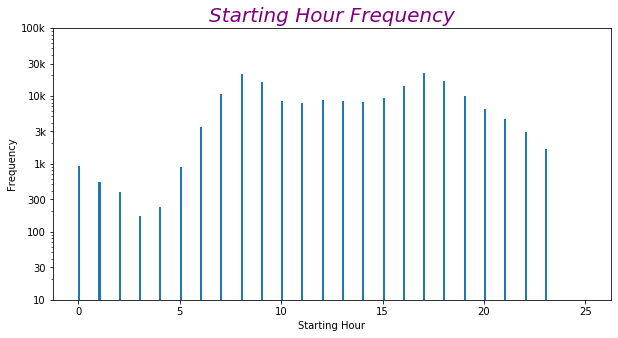

In [61]:
bin = np.arange(0,25+.1,.1)
plt.figure(figsize=(10,5))

plt.hist(data=df,x='start_hour',bins = bin);
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Starting Hour')
plt.ylabel('Frequency')
plt.title('Starting Hour Frequency',fontsize=20,fontweight=0,style='italic',color='purple');


#### As noticed that the most common starting hours is 8 Am, and 5 Pm

##### What are the most common days riders used to go on ?

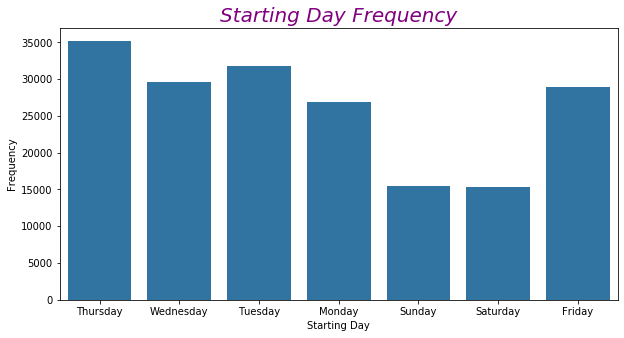

In [62]:
# the most common start_day

plt.figure(figsize=(10,5))
base_color = sb.color_palette()[0]
sb.countplot(data=df,x='start_day',color=base_color);
plt.xlabel('Starting Day')
plt.ylabel('Frequency')
plt.title('Starting Day Frequency',fontsize=20,fontweight=0,style='italic',color='purple');


#### From the above counplot we can see the frequency of each day in the week, obviously Thursday and Tuesday are the most common days bikers go on.

In [71]:
total = df['user_type'].value_counts().sum()
sub = df['user_type'].value_counts()[0]
cust = df['user_type'].value_counts()[1]

sub_prop = sub / total
cust_prop = cust / total
sub_prop

0.8916755719364055

In [69]:
user_count = df['user_type'].value_counts()

##### What is the percentage of user types in this bike share?

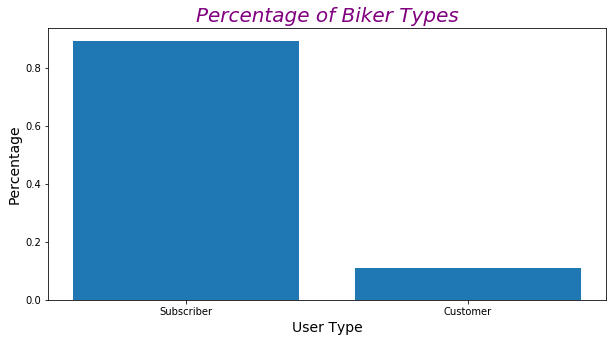

In [75]:
plt.figure(figsize=(10,5))
plt.bar(['Subscriber','Customer'],[sub_prop, cust_prop],)
plt.title("Percentage of Biker Types",fontsize=20, fontweight=0, color='purple', style='italic')
plt.xlabel("User Type",fontsize=14)
plt.ylabel("Percentage",fontsize=14);






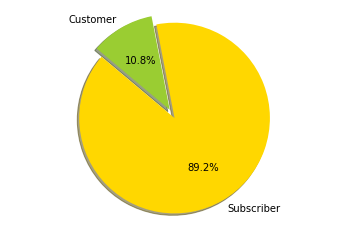

In [77]:
# Getting the percentage 
labels = 'Subscriber', 'Customer'
sizes = [sub_prop,cust_prop]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Subscriber riders are the dominant user type in this data set, about 90 % of all members are subscribers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the distributions above we found that the most two common start stations and end station are (San Francisco caltrain & Market street at 10th), and the distribution of duration falling around (250-2000) sec, According to bike ID column I made an assumption that those types are related to a specific bike type so I converted to a string to see which types are most used, The age distribution falling around(24-35) years old, Male has the most dominant count in the dadaset, and the most frequent starting hours are (8 Am and 5 Pm), The most frequent starting day is Thursdayday followed by Friday, and around 90% of the bikers are subscribers. 

> the unsuall points, at age column wherease 72 rows over 100 years old which is not make any sense, but i decided to keep them to not remove the whole rows or insert any random values to maintain the data credability .


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did remove some unwanted columns like the longitude and latitude, and converted the birth year column to a single age number 
and created a new column for the age category, start and end time columns has been converted to date time to be able to extract 
the day and hours, and used proportion count of user type to plot as percentage.

> Convert bike Id column to a string type to be treated as category not numeric

## Bivariate Exploration


#### Now we are going two see some cominations of the available features 

In [47]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    778.872761
Male      672.394851
Other     997.328489
Name: duration_sec, dtype: float64

#### What gender type spent the most duration during rides ?

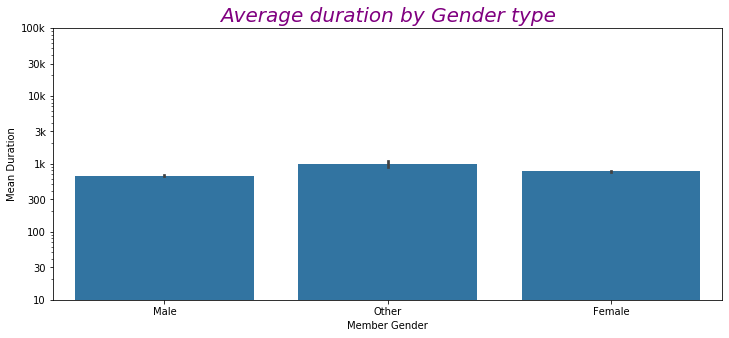

In [78]:
# Relation between Gender and spent duration
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.barplot(data=df,x='member_gender',y='duration_sec',color = based_color)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Member Gender')
plt.ylabel('Mean Duration')
plt.title('Average duration by Gender type',fontsize=20, fontweight=0, color='purple', style='italic');

#### From the plot we can observe that other and female gender type did spend more duration time than males

##### What days at which most spent duration recorded ?

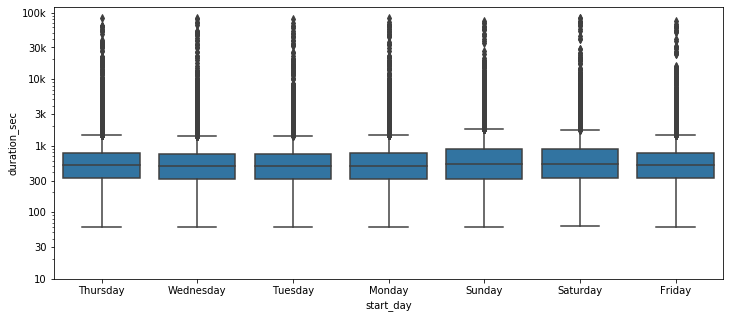

In [269]:
#plotting week days with spent duration
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.boxplot(data=df,x='start_day',y='duration_sec',color = based_color)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);

#### Sunday and Saturday are the most days that have the highest duration trip times followed by Thursday, we are going to contribute this later with gender type and user type to see what generes are making this high variance in these two days

##### What age range has spent higher duration through bike share ?

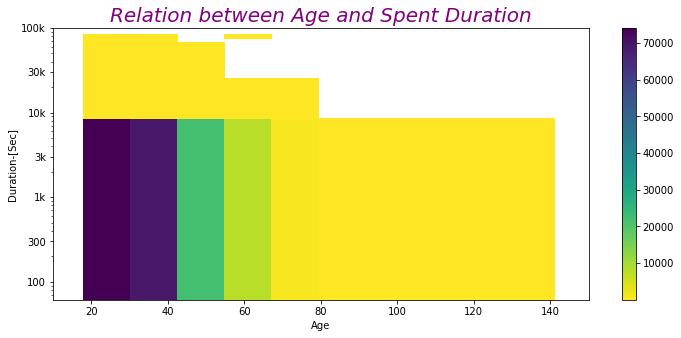

In [274]:
# Heat map to see the age range with most duration 
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
plt.hist2d(data=df,x='age',y='duration_sec',cmin= 0.5,cmap='viridis_r');
plt.yscale('log')
plt.xlim((10,150))
plt.colorbar();
plt.yticks([100, 300, 1000,3000,10000,30000,100000], ['100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Age')
plt.ylabel('Duration-[Sec]')
plt.title('Relation between Age and Spent Duration',fontsize=20,fontweight=0,color='purple',style='italic');

##### Another plot for age and spent duration

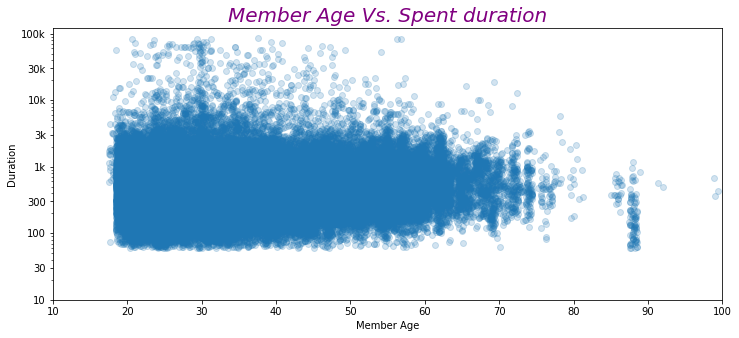

In [51]:
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.regplot(data=df,x='age',y='duration_sec',color = based_color,fit_reg=False,x_jitter=0.5,scatter_kws={'alpha':0.2})
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlim((10,100));
plt.xlabel('Member Age')
plt.ylabel('Duration')
plt.title('Member Age Vs. Spent duration',fontsize=20, fontweight=0, color='purple', style='italic');

#### Apparently we can see that younger the age the more time being spent on the ride, the upper left corner of the plot is more dense than the rest of the plot which means young and high duration time.

##### Is user type influenced by member gender ?

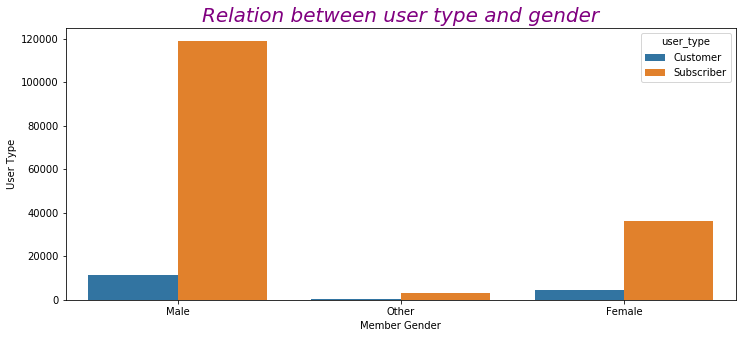

In [52]:
# Relation between User type and Gender 
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.countplot(data=df,x='member_gender',hue='user_type')

plt.xlabel('Member Gender')
plt.ylabel('User Type')
plt.title('Relation between user type and gender',fontsize=20, fontweight=0, color='purple', style='italic');

#### From the relationship between user type and gender, we found out that male subscribers are the most dominant here in the dataset comparing to the customers, same for female and others.

##### Is certain user type preferes certain days, most common days for both types if different ?

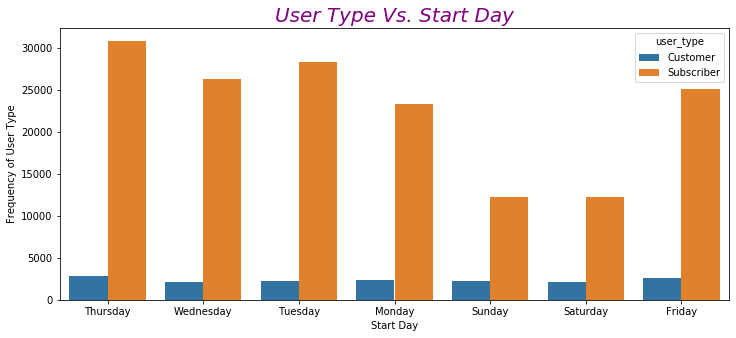

In [278]:
# the relation bewteen user type and start day, does subscribers have certain days to go on a ride 
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.countplot(data=df,x='start_day',hue='user_type')

plt.xlabel('Start Day')
plt.ylabel('Frequency of User Type')
plt.title('User Type Vs. Start Day',fontsize=20, fontweight=0, color='purple', style='italic');

#### As noticed from the plot that most common days for subscribers to go on a ride are Thursday and Tuesday , and for customer are Thursday and Friday.

##### Is there common days for certain genders ?

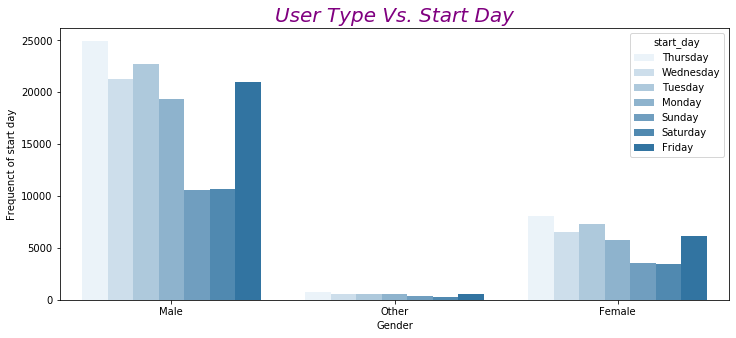

In [281]:
# Relation between gender and start day 
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
sb.countplot(data=df,x='member_gender',hue='start_day',color=based_color)

plt.xlabel('Gender')
plt.ylabel('Frequenct of start day')
plt.title('User Type Vs. Start Day',fontsize=20, fontweight=0, color='purple', style='italic');

#### Most common days for Males and Females are Thursday and Tuesday, for others Thursdays

##### which user types made higher duration times through these trips?


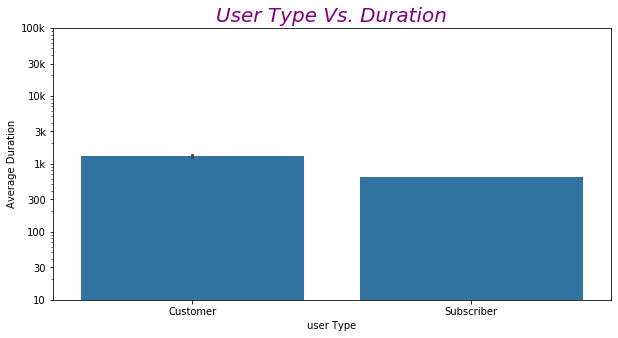

In [221]:
# plotting User type and average Duration
plt.figure(figsize=(10,5))
based_color = sb.color_palette()[0]
sb.barplot(data=df,x='user_type',y='duration_sec',color = based_color)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('user Type')
plt.ylabel('Average Duration')
plt.title('User Type Vs. Duration',fontsize=20, fontweight=0, color='purple', style='italic');


#### From  the above plot Customer user type has more spent duration than subscriber user type.However, we have much more subscribers than customers

### We are going to create a new column for age category which will be categorial type 

In [79]:
# Creating Age category Column
bins=[0,18,40,60,100]

# Setting labels 
labels=['teen','adult','old','Very old']
df['age_category'] = pd.cut(df['age'],bins=bins,labels=labels)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,age,start_date,start_day,start_hour,end_date,end_day,end_hour,duration_hrs,age_category
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,35.0,2019-02-28,Thursday,17,2019-03-01,Friday,8,0 days 14:29:45.830000,adult
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,No,NaN,2019-02-28,Thursday,18,2019-03-01,Friday,6,0 days 11:48:41.267000,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,47.0,2019-02-28,Thursday,12,2019-03-01,Friday,5,0 days 17:10:54.928000,old
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,30.0,2019-02-28,Thursday,17,2019-03-01,Friday,4,0 days 10:08:10.832000,adult
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,45.0,2019-02-28,Thursday,23,2019-03-01,Friday,0,0 days 00:26:25.525000,old


##### Does certain age category involved with different start days than other categories? 

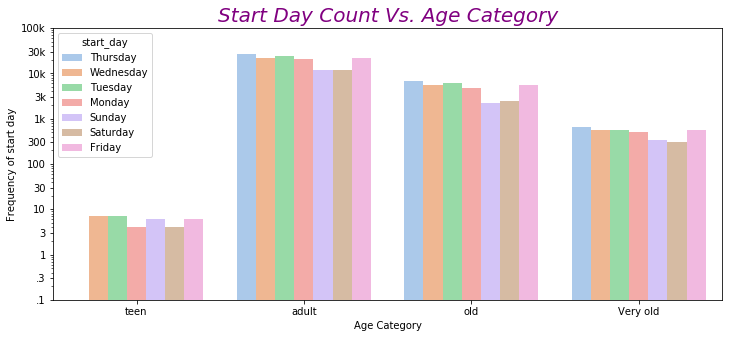

In [232]:
# Relation between Age category and start day 
# Does certain ages go on certain days
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[9]
sb.countplot(data=df,x='age_category',hue='start_day',palette= 'pastel')

plt.yscale('log')
plt.yticks([.1,.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['.1','.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Age Category')
plt.ylabel('Frequency of start day')
plt.title('Start Day Count Vs. Age Category',fontsize=20, fontweight=0, color='purple', style='italic');

#### From start day and age category relationship we found out that Teens most common days are Wednesday and Tuesday, on the other hand  Adults with age 18 to 40 most common days Thursday and Tuesday, old(40-60) and very old people(>60) most common days are Friday and Thursday, Although the whole dataset was Thursday and Tuseday  are the most common start days

##### What is the count of subscribers and customers in each age cateorgy ?

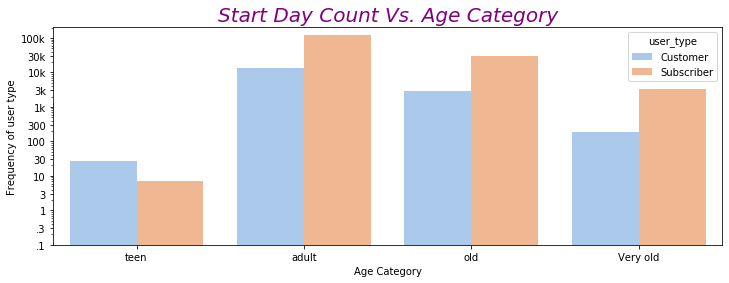

In [231]:
#Plotting user type and age category
based_color = sb.color_palette()[9]
sb.countplot(data=df,x='age_category',hue='user_type',palette= 'pastel')

plt.yscale('log')
plt.yticks([.1,.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['.1','.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Age Category')
plt.ylabel('Frequency of user type')
plt.title('Start Day Count Vs. Age Category',fontsize=20, fontweight=0, color='purple', style='italic');

#### From this plot, all age groups have higher subscribers than customers except for teens category customers number is higher 

##### Does starting from a specific hours influence the trip duration ?

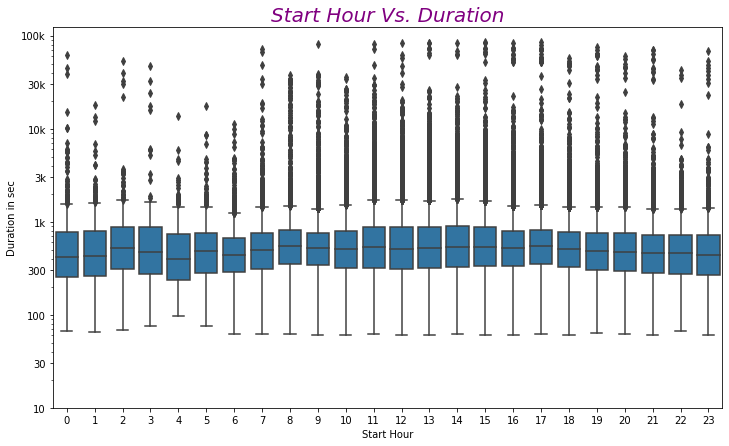

In [84]:
# Start hour and duration
base_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df,x='start_hour',y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k'])
plt.xlabel('Start Hour')
plt.ylabel('Duration in sec')
plt.title('Start Hour Vs. Duration',fontsize=20, fontweight=0, color='purple', style='italic');



#### Obviously the morning start hour tends to has higher duration spent on the trip, on the left side of the box plot the interquartiles and medians at 2,3 Am located at higher portion of duration column.

In [85]:
count_names = df['start_station_name'].value_counts()
threshold = 2000
idx = np.sum(count_names > threshold)
most_station = count_names.index[:idx] 

In [86]:
df_sub = df.loc[df['start_station_name'].isin(most_station)]

##### Does certain start locations lead to higher duration times ?   

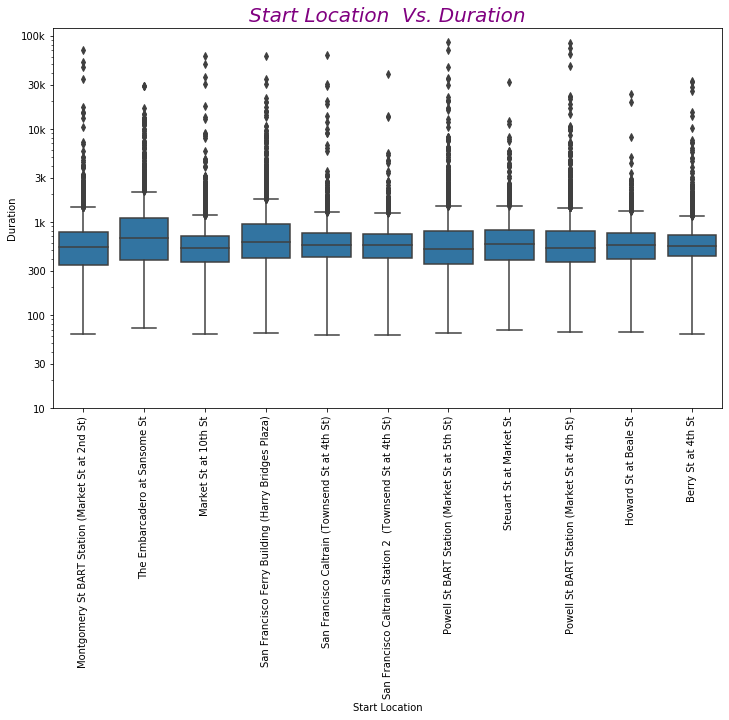

In [88]:
# Start hour and start location 
base_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df_sub,x='start_station_name',y='duration_sec',color=base_color)
plt.xlabel('station name')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlabel('Start Location')
plt.ylabel('Duration')
plt.title('Start Location  Vs. Duration',fontsize=20, fontweight=0, color='purple', style='italic');


#### start station San Francisco Ferry building is one of the most common start staions bikers begin with and spent the highest duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We found that (other gender type did the highest duration trip time), followed by female, and men are the last in duration frequecy, from scatterplot of age and duration we found that the younger the age the most duration has been spent on the trip, subscriber numbers are higher in the three gender types than customers.

> The most frequent day for subscribers is the same as for customers is Thursday, followed by Friday.
> From the age category column that I created I did a couple of plots to figure if there is any different information about duration,start day we can find, from the plot I found that each age category has it's own common start day 
>From start day and age category relationship we found out that Teens prefer to go on Wednesday and Tuesday, on the other hand  Adults with age 18 to 40 prefer to go onn Thursday and Tuesday, old and very old people prefer Friday and Thursday, Despite the whole dataset was Thursday and Tuseday only are the most common days.
> Subscriber bikers are more than customers in all age groups except for teens category(0-18)years old, customers more than subscribers.

> Customer user type did higher duration trip than subscribers, although the very high perecntage of subscribers.
> The earlier the start hour the more duration the biker tend to spend, and the most common start station that biker starts from and spend the longest duration is (San franscisco Ferry Building(harry Bridges Plaza).
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Despite the high perecntage of male in the datasetset, but Female and other spent more duration during trip,
> that customers membership type also did a higher duration than subscribers
> That when we categorized the age we found new common start days


## Multivariate Exploration



#### let's Check after we found out that sunday an saturday are the days that has the most spent duration and from univariate gender type plot we found that other gender has the most spent duration as well.

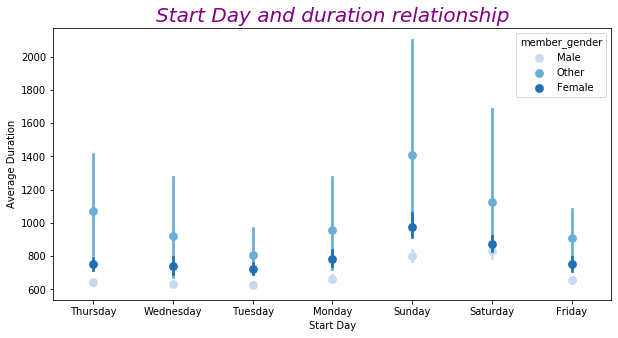

In [61]:
# plotting start day and average duration with gender 
plt.figure(figsize=(10,5))
sb.pointplot(data =df, x = 'start_day', y = 'duration_sec',
           palette = 'Blues', linestyles = '',hue='member_gender')


plt.xlabel('Start Day')
plt.ylabel('Average Duration')
plt.title('Start Day and duration relationship',fontsize=20, fontweight=0, color='purple', style='italic');

#### From the above pointplot, Other and Female gender types spent the highest duration on sunday and saturday, which causes that sundays and saturdays has the highest duration spent during the whole week.

##### Confirmation by barplot

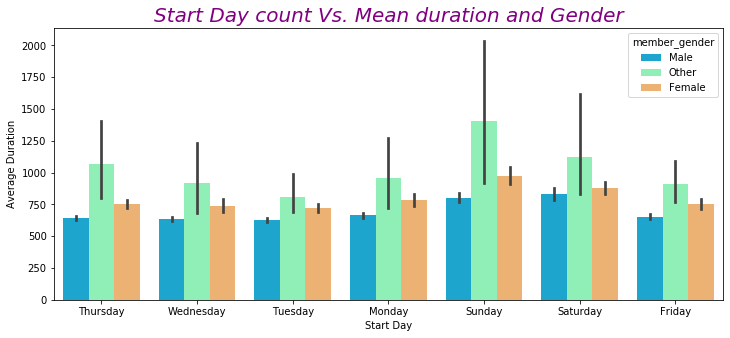

In [225]:
# Plot start day and duration with Gender type in barplot
plt.figure(figsize=(12,5))
sb.barplot(data = df,x='start_day',y='duration_sec',hue='member_gender',palette='rainbow')

#plt.yscale('log')
plt.xlabel('Start Day')
plt.ylabel('Average Duration')
plt.title('Start Day count Vs. Mean duration and Gender',fontsize=20, fontweight=0, color='purple', style='italic');

#### As we can see from the pointplot and the barplot that sunday and saturday has the most spent duration that other and female bikers did on the rides  on (Sunday and Saturday) causing the most duration times through these days

##### Does customer user type still makes higher duration than subscribers in Sundays and Saturdays?

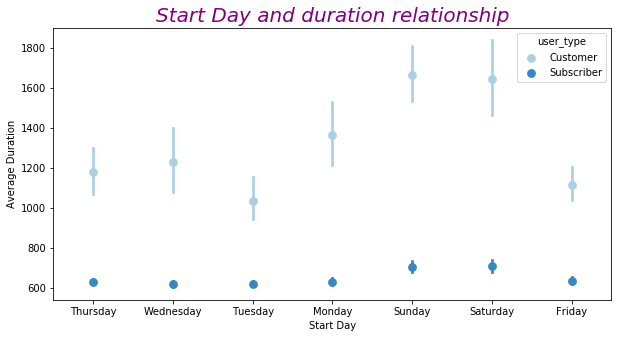

In [226]:
# Plot start day and duration by user type
plt.figure(figsize=(10,5))
sb.pointplot(data =df, x = 'start_day', y = 'duration_sec',
           palette = 'Blues', linestyles = '',hue='user_type')


plt.xlabel('Start Day')
plt.ylabel('Average Duration')
plt.title('Start Day and duration relationship',fontsize=20, fontweight=0, color='purple', style='italic');

#### From this plot we can get the insight of the user type who spend more duration and the days spent on the most as well as we interpreted before, this plot to assure that customer is spending more time during trip than subscriber on sundays and saturdays the most

##### Younger bikers spent the highest duration, Female and other gender type spent the highest duration, does age category with different gender types has a different insight ?

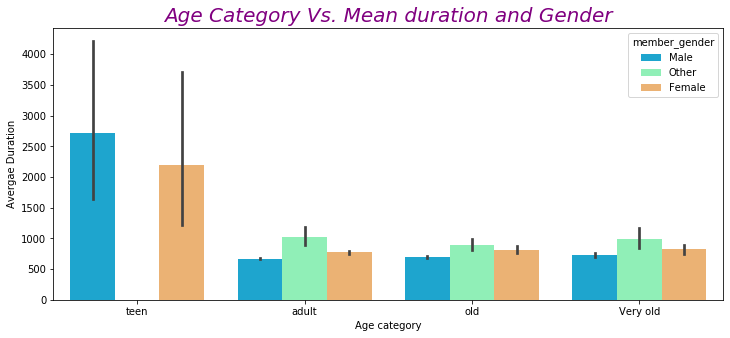

In [90]:
# Age category, duration and Gender relationship
plt.figure(figsize=(12,5))
sb.barplot(data = df,x='age_category',y='duration_sec',hue='member_gender',palette='rainbow')


plt.xlabel('Age category')
plt.ylabel('Avergae Duration')
plt.title('Age Category Vs. Mean duration and Gender',fontsize=20, fontweight=0, color='purple', style='italic');

#### From this barplot we can figure that teen age (from 0 to 18) years old has no other type gender, and male teen spent more time during trip than female and teen category in general has the most duration time which make sense(depending on the youngerth e more duration spent from previous plots).However, (other gender type) as mentioned before has the most spent duration trips in Adult category and older age categories. followed by females

##### Does customer user type has higher duration in all age categories?

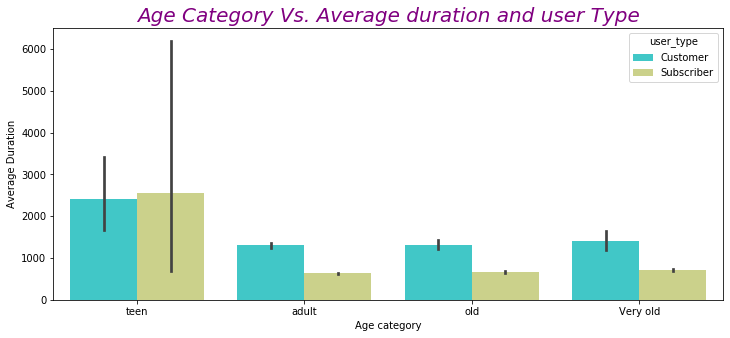

In [89]:
#plotting age category and duration with user type
plt.figure(figsize=(12,5))
sb.barplot(data = df,x='age_category',y='duration_sec',hue='user_type',palette='rainbow')


plt.xlabel('Age category')
plt.ylabel('Average Duration')
plt.title('Age Category Vs. Average duration and user Type',fontsize=20, fontweight=0, color='purple', style='italic');

#### customers from adult and older spend more time during trip than subscribers from adult and older which reconfirom that customers at all spend more time during trip much more than subscribers, except for the teen category (0-18 Y.O) subscriber teens spent more duration than customers.

##### Reconfirmation on user type , gender and duration relationship

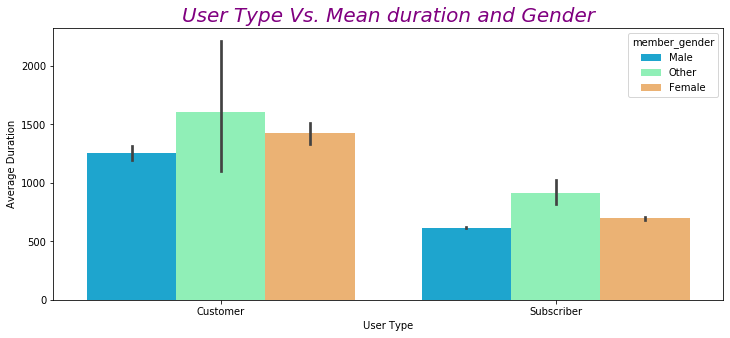

In [282]:
# User Type, gender and duration relationship
plt.figure(figsize=(12,5))
sb.barplot(data = df,x='user_type',y='duration_sec',hue='member_gender',palette='rainbow')


plt.xlabel('User Type')
plt.ylabel('Average Duration')
plt.title('User Type Vs. Mean duration and Gender',fontsize=20, fontweight=0, color='purple', style='italic');

#### The customer user type has the highest duration all over three types gender, and specifically the highest duration spent as mentioned before belongs to other and female gender type

##### what is the starting hours accompanied with highest duration, and does it confirm the same starting hours we got above with higher duration time ? 

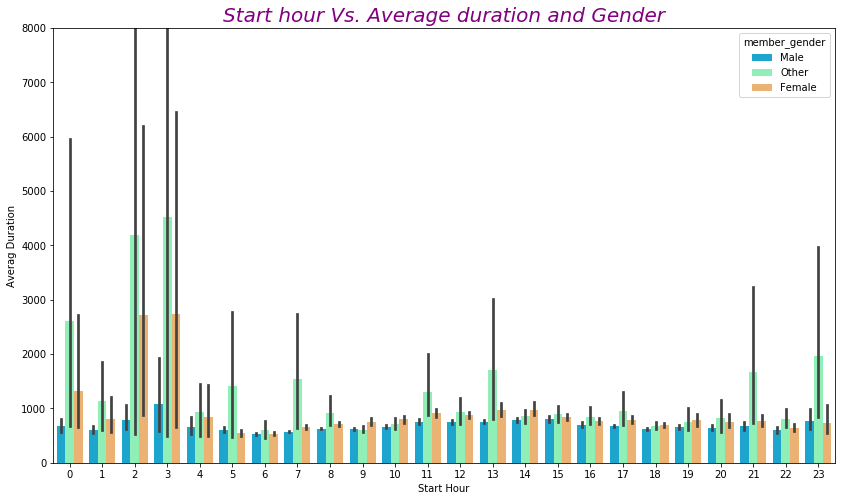

In [92]:
#plotting start hour and average duration by gender
plt.figure(figsize=(14,8))
sb.barplot(data = df,x='start_hour',y='duration_sec',hue='member_gender',palette='rainbow')


plt.xlabel('Start Hour')
plt.ylabel('Averag Duration')
plt.title('Start hour Vs. Average duration and Gender',fontsize=20, fontweight=0, color='purple', style='italic');
plt.ylim((0,8000));

#### This plot assure that female and other type gender have the highest duration time. Moreover, starting hours around 2 and 3 Am has the most duration time , which in conclusion made it clear about that the gender who did the most duration actually fall in the same start hour zone of the most duration which we clarified before that most duration hourrs spent belongs to riders start the trip from 2 or  3 am and mostly done by other and female gender types.

##### Reassurance of Age, Gender and spent duration 

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

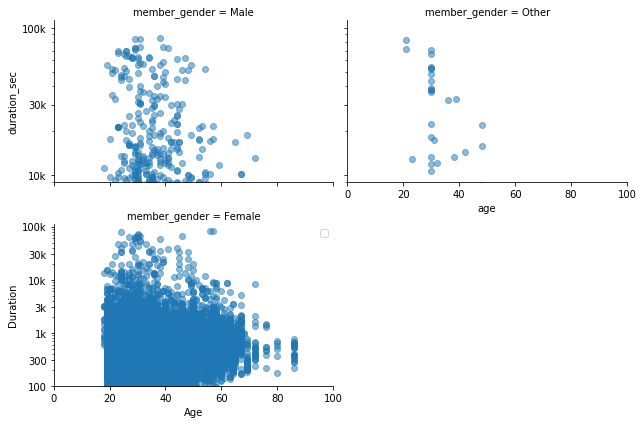

In [95]:
# plotting the three genders together with age and duration
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='member_gender',col_wrap=2,size=3,aspect=1.5)
g.map(plt.scatter,'age','duration_sec',alpha=.5);
plt.legend()
plt.yscale('log')
plt.yticks([100, 300, 1000,3000,10000,30000,100000], ['100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlim((0,100));

plt.xlabel('Age')
plt.ylabel('Duration');


#### This 3 plots  shows more density at upper left portion of female scatter plot than male, but it doesnt show it properly for other gender type due to the low count of pther in the data set but we did observed that other has the highest duration spent from barplots

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

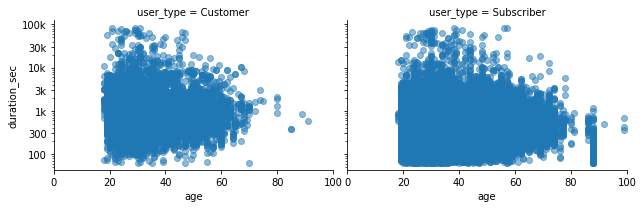

In [260]:
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='user_type',size=3,aspect=1.5)
g.map(plt.scatter,'age','duration_sec',alpha=.5);

plt.yscale('log')
plt.yticks([100, 300, 1000,3000,10000,30000,100000], ['100','300', '1k','3k', '10k', '30k', '100k']);
plt.xlim((0,100));

#### reconfirmation by scatterplots for customer and subscriber, as we can see the upper left portion in customer plot higher in density than subscriber user type.

#### From thhese scatter plots we can see that subscribers age range is wider than customer age range

In [93]:
count_names = df['start_station_name'].value_counts()
threshold = 2000
idx = np.sum(count_names > threshold)
most_station = count_names.index[:idx] 


#count_names_end = df['end_station_name'].value_counts()
#threshold = 2000
#idx2 = np.sum(count_names_end > threshold)
#most_station_end = count_names_end.index[:idx2] 


In [113]:
df_sub = df.loc[df['start_station_name'].isin(most_station)]
df_sub2 = df.loc[df['end_station_name'].isin(most_station_end)]

##### Start Stations that riders start from and spend higher duration

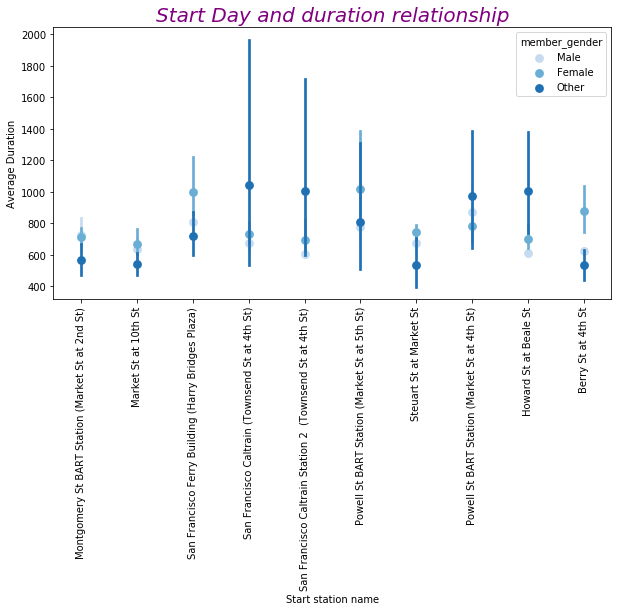

In [129]:
plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub, x = 'start_station_name', y = 'duration_sec',
           palette = 'Blues', linestyles = '',hue='member_gender')                                                                                                                                                                           


plt.xlabel('Start station name')
plt.xticks(rotation=90)
plt.ylabel('Average Duration')
plt.title('Start Day and duration relationship',fontsize=20, fontweight=0, color='purple', style='italic');


#### San Franscisco caltrain, San Franscisco caltrain station2 are the most dtart stations of most common station accompanied by higher duration than other sations

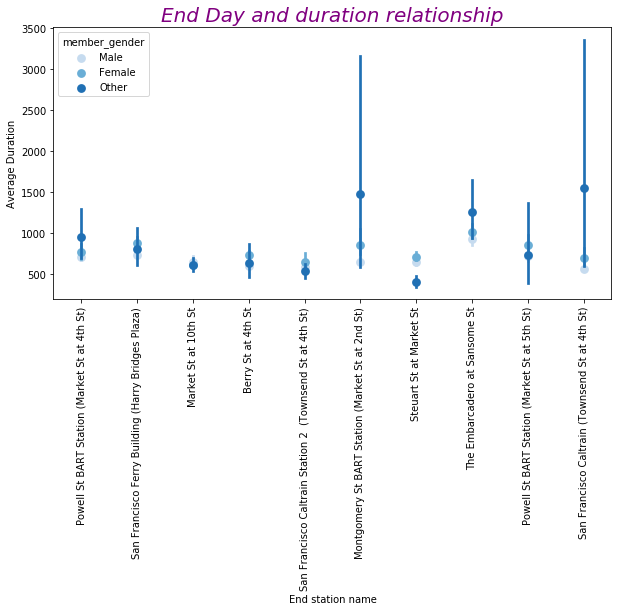

In [132]:
plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub2, x = 'end_station_name', y = 'duration_sec',
           hue='member_gender',palette = 'Blues', linestyles = '',dodge=False)                                                                                                                                                                           


plt.xlabel('End station name')
plt.xticks(rotation=90)
plt.ylabel('Average Duration')
plt.title('End Day and duration relationship',fontsize=20, fontweight=0, color='purple', style='italic');


##### Confirmation of Gender, User type, and duration relationship

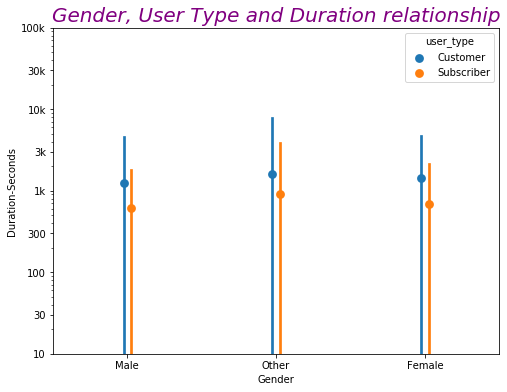

In [96]:

#plotting gender,user type and duration
plt.figure(figsize = [8,6])

ax = sb.pointplot(data =df, x = 'member_gender', y = 'duration_sec', hue = 'user_type',ci='sd',dodge=True,linestyles=" ")


plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
ax.set_yticklabels([], minor = True)
plt.xlabel('Gender')
plt.ylabel('Duration-Seconds')
plt.title('Gender, User Type and Duration relationship',fontsize=20, fontweight=0, color='purple', style='italic');

plt.show();

#### This plot assure that Customers made higher duration than subscribers and other type and females did higher duration than males

#### Confirmation of highest spent duration in certain days and certain start hours rides

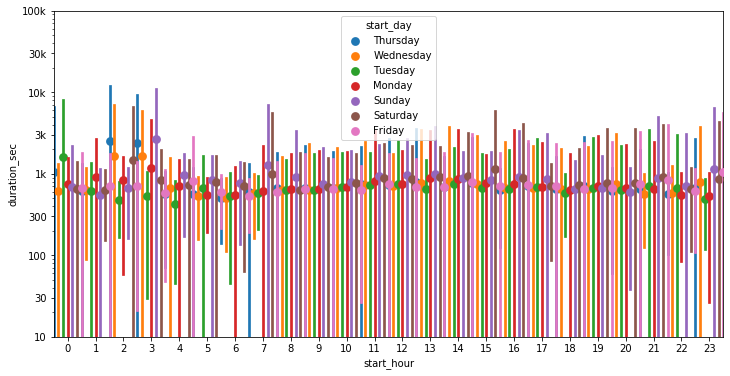

In [246]:
plt.figure(figsize = [12,6])

ax = sb.pointplot(data =df, x = 'start_hour', y = 'duration_sec', hue = 'start_day',ci='sd',dodge=1,linestyles=" ")


plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1000,3000,10000,30000,100000], ['10','30','100','300', '1k','3k', '10k', '30k', '100k']);
ax.set_yticklabels([], minor = True)

plt.show();

#### From this point plot we can see that Sunday, Saturday,Thursday, and Tuesday with starting hours (12,1,2,3,7,8) Am contributed with the highest duration spent, and all fall on the left portion of the plot in the early hours zone

In [ ]:
!jupyter nbconvert Bike_presentation.ipynb --to slides --post serve --no-input --no-promp

> After plotting start day,gender and avergae duration together, we confirmed that Sunday & Saturday have highest spent duration than other days and which mostly done by other and Female gender types.
> Confirmed that customer user type has higher duration time than subscriber user type in general , at Sundays and Saturdays the most.
> Found that ther is no other gendertype in teen age(0-18)years old category, and males have the most spent trip durations in only teen category, unlike other older groups; other and females gender types have higher spent duration than males.
> Teen age category subscribers have slightly higher spent duration over customers, unlike other groups customers have higher average duration spent than subscribers.
> (customer user type of other & Female gender) spent higher trip duration than(subscriber user type of other and Female gender).
> from bivariate plot (start hour,duration), we saw that bikers spent more time on the trip when they start at early hours(2-3-7-8 Am) and we confirmed that by the multivariate pointplot including the days with the highest duration spent on which are (Sunday-Saturday-Thursday-Tuesday) which done mostly by other and female gender types from the barplot(start hour-gender).
> Start stations accompanied by the highest duration are (San Franscisco - Harry Bridges )&(San Franscisco caltrain station2 town send st. 4th st), on the other hand end stations accompanied by the highest duration spent are (Montgomry st BART station) & (San Franscisco caltrain station2 town send st. 4th st)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After plotting start day,gender and avergae duration together, we confirmed that Sunday & Saturday have highest spent duration than other days and which mostly done by other and Female gender types.
> Confirmed that customer user type has higher duration time than subscriber user type in general , at Sundays and Saturdays the most.
> Found that ther is no other gendertype in teen age(0-18)years old category, and males have the most spent trip durations in only teen category, unlike other older groups; other and females gender types have higher spent duration than males.
> Teen age category subscribers have slightly higher spent duration over customers, unlike other groups customers have higher average duration spent than subscribers.
> (customer user type of other & Female gender) spent higher trip duration than(subscriber user type of other and Female gender).
> from bivariate plot (start hour,duration), we saw that bikers spent more time on the trip when they start at early hours(2-3-7-8 Am) and we confirmed that by the multivariate pointplot including the days with the highest duration spent on which are (Sunday-Saturday-Thursday-Tuesday) which done mostly by other and female gender types from the barplot(start hour-gender).
> Start stations accompanied by the highest duration are (San Franscisco - Harry Bridges )&(San Franscisco caltrain station2 town send st. 4th st), on the other hand end stations accompanied by the highest duration spent are (Montgomry st BART station) & (San Franscisco caltrain station2 town send st. 4th st)

### Were there any interesting or surprising interactions between features?

> Teens have more customer types than subscribers which is not surorise due to the young age and less indpendency to subscribe, but what was interseting that customer type making higher duration trips than subscriber type member in all categories except for teens from (0-18), Also despite males have the largest count on the dataset about 75%, other and female gender type did the highest duration trips

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [1]:
jupyter nbconvert Bike Share Data presentation.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-1-2dddb48c9722>, line 1)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!